# Titanic Survival Prediction Project

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [6]:
df.shape

(891, 12)

891 rows and 12 columns

In [7]:
# To see columns in a list
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

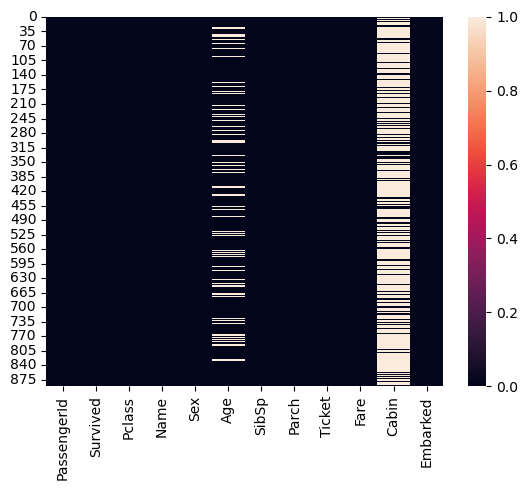

In [10]:
# Lets see using heatmap
sns.heatmap(df.isnull())

Here, we can see that null values present in 'Age', 'Cabin' and 'Embarked' columns.

# Dealing with Missing Values

In [11]:
#No. of Null values 
print("No. of Null values in 'Age' is ",df['Age'].isnull().sum())
print("No. of Null values in 'Cabin' is ",df['Cabin'].isnull().sum())
print("No. of Null values in 'Embarked' is ",df['Embarked'].isnull().sum())


No. of Null values in 'Age' is  177
No. of Null values in 'Cabin' is  687
No. of Null values in 'Embarked' is  2


In 'Embarked' column only 2 null values.

In [12]:
#precentage of null values
print("Percentage of Null values in 'Age' is ",(df['Age'].isnull().sum()/df.shape[0]*100))
print("Percentage of Null values in 'Cabin' is ",(df['Cabin'].isnull().sum()/df.shape[0]*100))
print("Percentage of Null values in 'Embarked' is ",(df['Embarked'].isnull().sum()/df.shape[0]*100))

Percentage of Null values in 'Age' is  19.865319865319865
Percentage of Null values in 'Cabin' is  77.10437710437711
Percentage of Null values in 'Embarked' is  0.22446689113355783


Here, we can see that

    1.In "cabin" column, 77% values are missing and it is not important in predicting survival rate, so we can drop this            column
    2.In "Embarked" column, only 2 values are missing, since it is a categorical column, we will replace it with most       frequent data.
    3.In "Age" column, 19.8% datas are missing.

In [13]:
for i in df.columns:
    print("No. of unique values in ",i)
    print(df[i].nunique())

No. of unique values in  PassengerId
891
No. of unique values in  Survived
2
No. of unique values in  Pclass
3
No. of unique values in  Name
891
No. of unique values in  Sex
2
No. of unique values in  Age
88
No. of unique values in  SibSp
7
No. of unique values in  Parch
7
No. of unique values in  Ticket
681
No. of unique values in  Fare
248
No. of unique values in  Cabin
147
No. of unique values in  Embarked
3


In [14]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [15]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df["Embarked"].fillna(df["Embarked"].value_counts().idxmax(), inplace = True)

In [17]:
df['Embarked'].isnull().sum()

0

In [18]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

As, we can see that, missing values in "Embarked" column replaced with most frequent datas.

In [19]:
#Dropping "Cabin" column
df.drop('Cabin', axis=1, inplace=True)

In [20]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Missing values in Age column

In [21]:
df['Age'].isnull().sum()

177

In [22]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

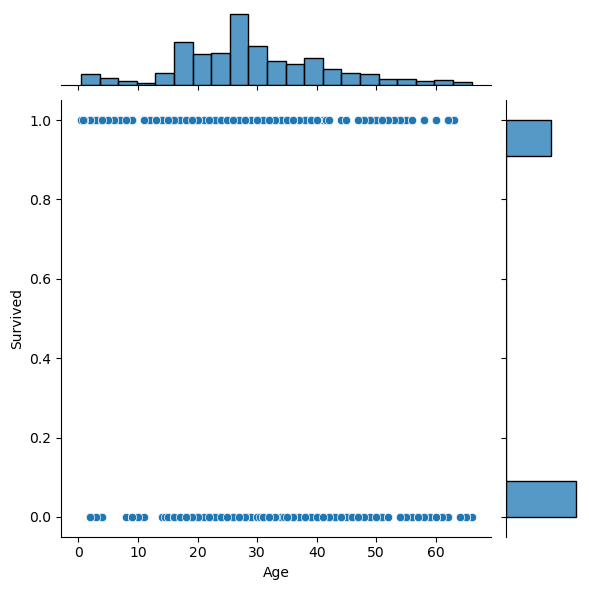

In [128]:
sns.jointplot(x='Age',y='Survived',data=df)

<Axes: xlabel='Age', ylabel='Survived'>

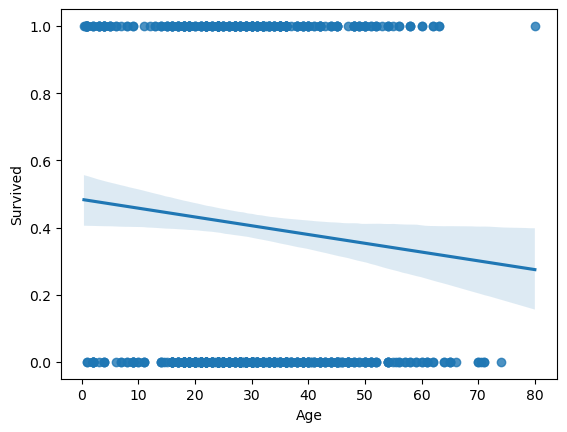

In [24]:
sns.regplot(x='Age',y='Survived',data=df)

Here, we can see that survival rate is more in lesser age group. 
If we replace missing values in "Age" with mean or median or mode, it will distort the dataset.
So, we will group this with "Title", "Pclass" and "sex".

In [25]:
# Split the column name into Last name, Title, First Name
df[['Last Name', 'Title First Name']] = df["Name"].str.split(',', expand=True)
df[['Title', 'First Name']] = df["Title First Name"].str.split('.', n=1, expand=True)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title First Name,Title,First Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr. Owen Harris,Mr,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss. Laina,Miss,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,Mr. William Henry,Mr,William Henry


In [27]:
df.groupby(["Title", "Sex", "Pclass"])["Age"].median()

Title          Sex     Pclass
 Capt          male    1         70.0
 Col           male    1         58.0
 Don           male    1         40.0
 Dr            female  1         49.0
               male    1         44.0
                       2         38.5
 Jonkheer      male    1         38.0
 Lady          female  1         48.0
 Major         male    1         48.5
 Master        male    1          4.0
                       2          1.0
                       3          4.0
 Miss          female  1         30.0
                       2         24.0
                       3         18.0
 Mlle          female  1         24.0
 Mme           female  1         24.0
 Mr            male    1         40.0
                       2         31.0
                       3         26.0
 Mrs           female  1         41.5
                       2         32.0
                       3         31.0
 Ms            female  2         28.0
 Rev           male    2         46.5
 Sir           male 

In [28]:
df["Age"] = df.groupby(["Title", "Sex", "Pclass"])["Age"].apply(lambda x: x.fillna(x.median()))

In [29]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            0
Last Name           0
Title First Name    0
Title               0
First Name          0
dtype: int64

Now no null vales/missing values.

In [30]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title First Name,Title,First Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr. Owen Harris,Mr,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss. Laina,Miss,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Allen,Mr. William Henry,Mr,William Henry
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,Q,Moran,Mr. James,Mr,James
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,McCarthy,Mr. Timothy J,Mr,Timothy J
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Palsson,Master. Gosta Leonard,Master,Gosta Leonard
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Mrs,Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Nasser,Mrs. Nicholas (Adele Achem),Mrs,Nicholas (Adele Achem)


In [31]:
df.drop(['Last Name', 'Title First Name', 'First Name'], axis=1, inplace=True)

In [32]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [33]:
df.drop(['Name', 'PassengerId', 'Ticket', 'Title'], axis=1, inplace=True)

In [34]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [35]:
#Rearranging the dataframe
df=df[['Sex','Age','SibSp','Parch','Pclass','Embarked','Fare','Survived']]
df

,Sex,Age,SibSp,Parch,Pclass,Embarked,Fare,Survived
0,male,22.0,1,0,3,S,7.2500,0
1,female,38.0,1,0,1,C,71.2833,1
2,female,26.0,0,0,3,S,7.9250,1
3,female,35.0,1,0,1,S,53.1000,1
4,male,35.0,0,0,3,S,8.0500,0
...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,2,S,13.0000,0
887,female,19.0,0,0,1,S,30.0000,1
888,female,18.0,1,2,3,S,23.4500,0
889,male,26.0,0,0,1,C,30.0000,1


In [36]:
df.describe()

,Age,SibSp,Parch,Pclass,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.143850,0.523008,0.381594,2.308642,32.204208,0.383838
std,13.496074,1.102743,0.806057,0.836071,49.693429,0.486592
min,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,2.000000,7.910400,0.000000
50%,26.000000,0.000000,0.000000,3.000000,14.454200,0.000000
75%,36.750000,1.000000,0.000000,3.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,3.000000,512.329200,1.000000


# Data Visualization

Univariant Analysis

0    549
1    342
Name: Survived, dtype: int64

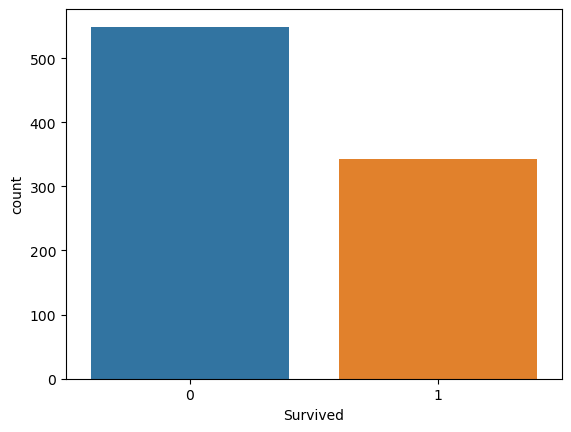

In [37]:
sns.countplot(x='Survived', data =df)
df['Survived'].value_counts()

Here we can see that, Survived persons are less compared to Dead.

male      577
female    314
Name: Sex, dtype: int64

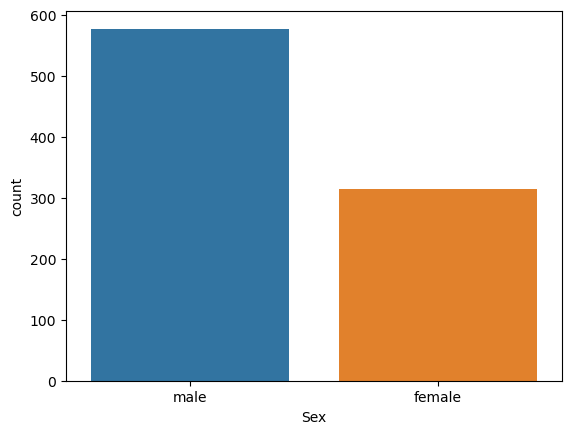

In [38]:
sns.countplot(x='Sex', data =df)
df['Sex'].value_counts()

Count of male is higher than female, that includes children also 

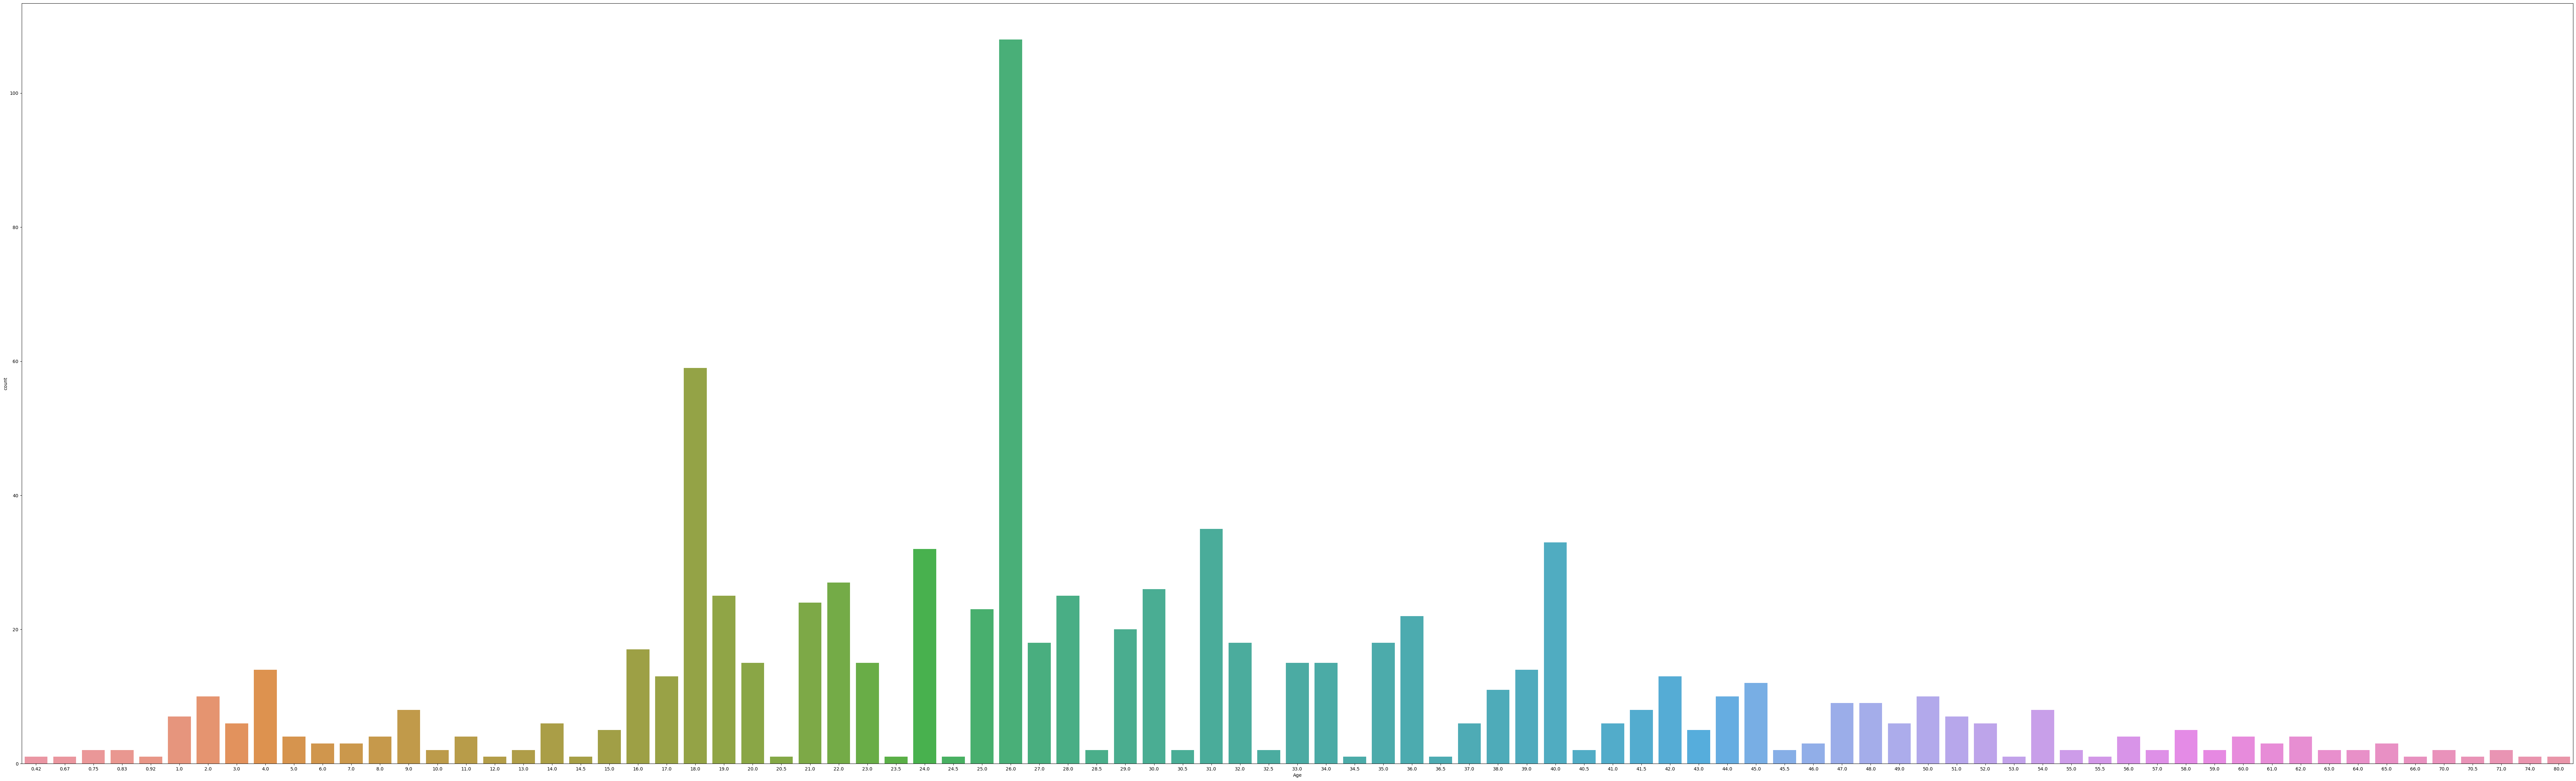

26.00    108
18.00     59
31.00     35
40.00     33
24.00     32
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

In [39]:
plt.figure(figsize = (100,30))
sns.countplot(x='Age', data =df)
plt.show()
df['Age'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

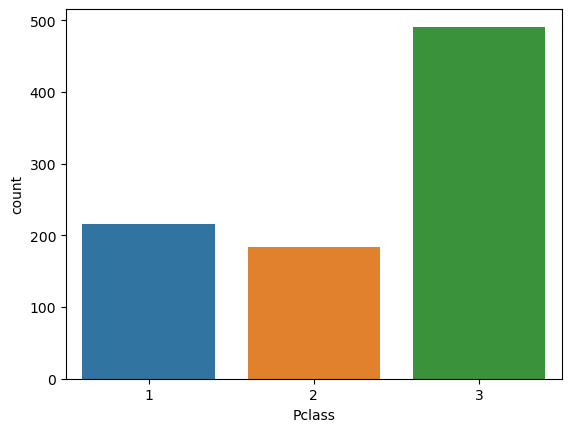

In [40]:
sns.countplot(x='Pclass', data =df)
df['Pclass'].value_counts()

People more in 3rd class

S    646
C    168
Q     77
Name: Embarked, dtype: int64

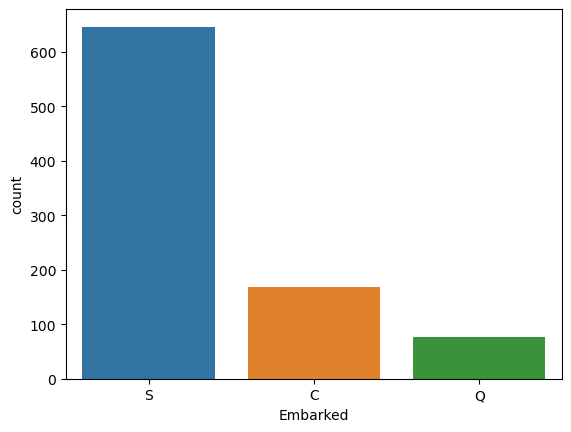

In [41]:
sns.countplot(x='Embarked', data =df)
df['Embarked'].value_counts()

Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Most people embaeked from Southampton port

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

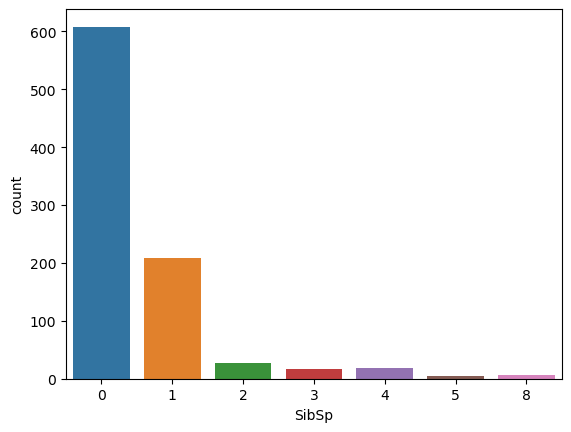

In [42]:
sns.countplot(x='SibSp', data =df)
df['SibSp'].value_counts()

Most number of people did not have any Siblings/Spouses

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

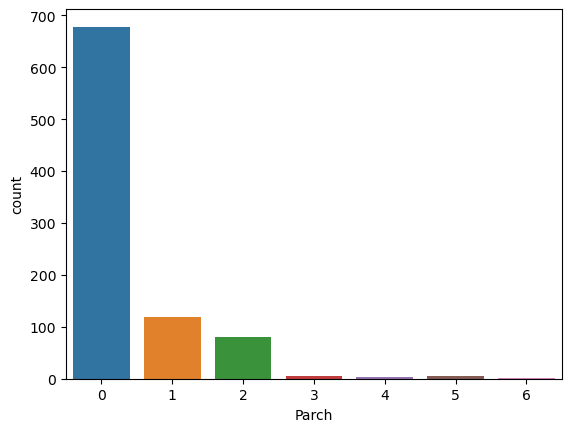

In [43]:
sns.countplot(x='Parch', data =df)
df['Parch'].value_counts()

Most number of people did not have any Parents/children

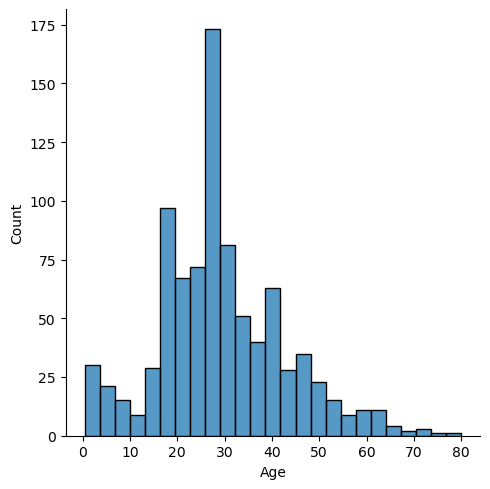

In [44]:
sns.displot(df['Age'])

<Axes: xlabel='Age', ylabel='Density'>

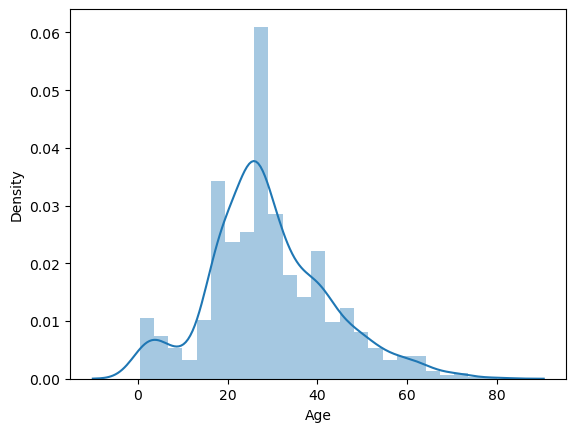

In [45]:
sns.distplot(df['Age'])

<Axes: xlabel='SibSp', ylabel='Density'>

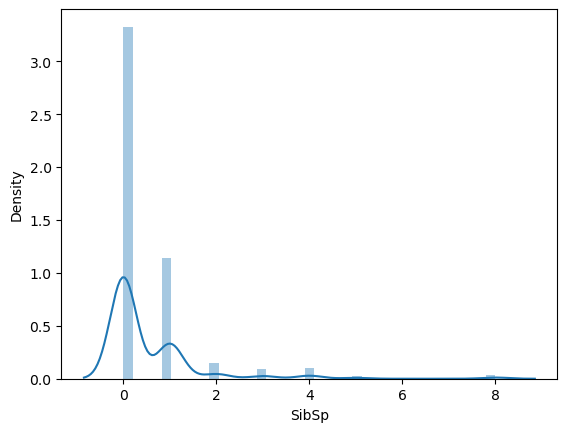

In [46]:
sns.distplot(df['SibSp'])

<Axes: xlabel='Parch', ylabel='Density'>

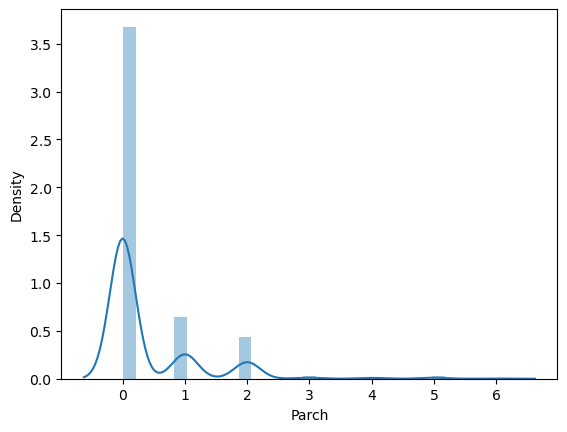

In [47]:
sns.distplot(df['Parch'])

<Axes: xlabel='Fare', ylabel='Density'>

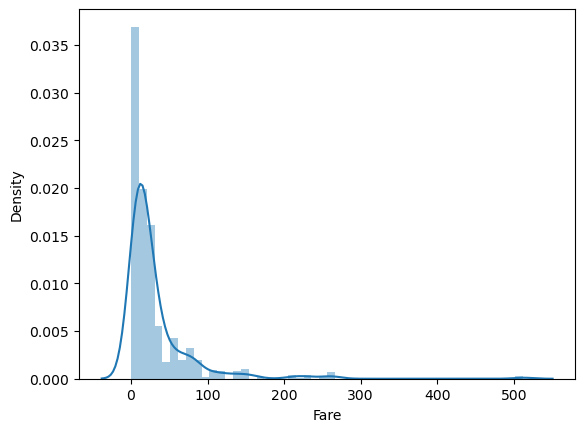

In [48]:
sns.distplot(df['Fare'])

Bivariant Analysis

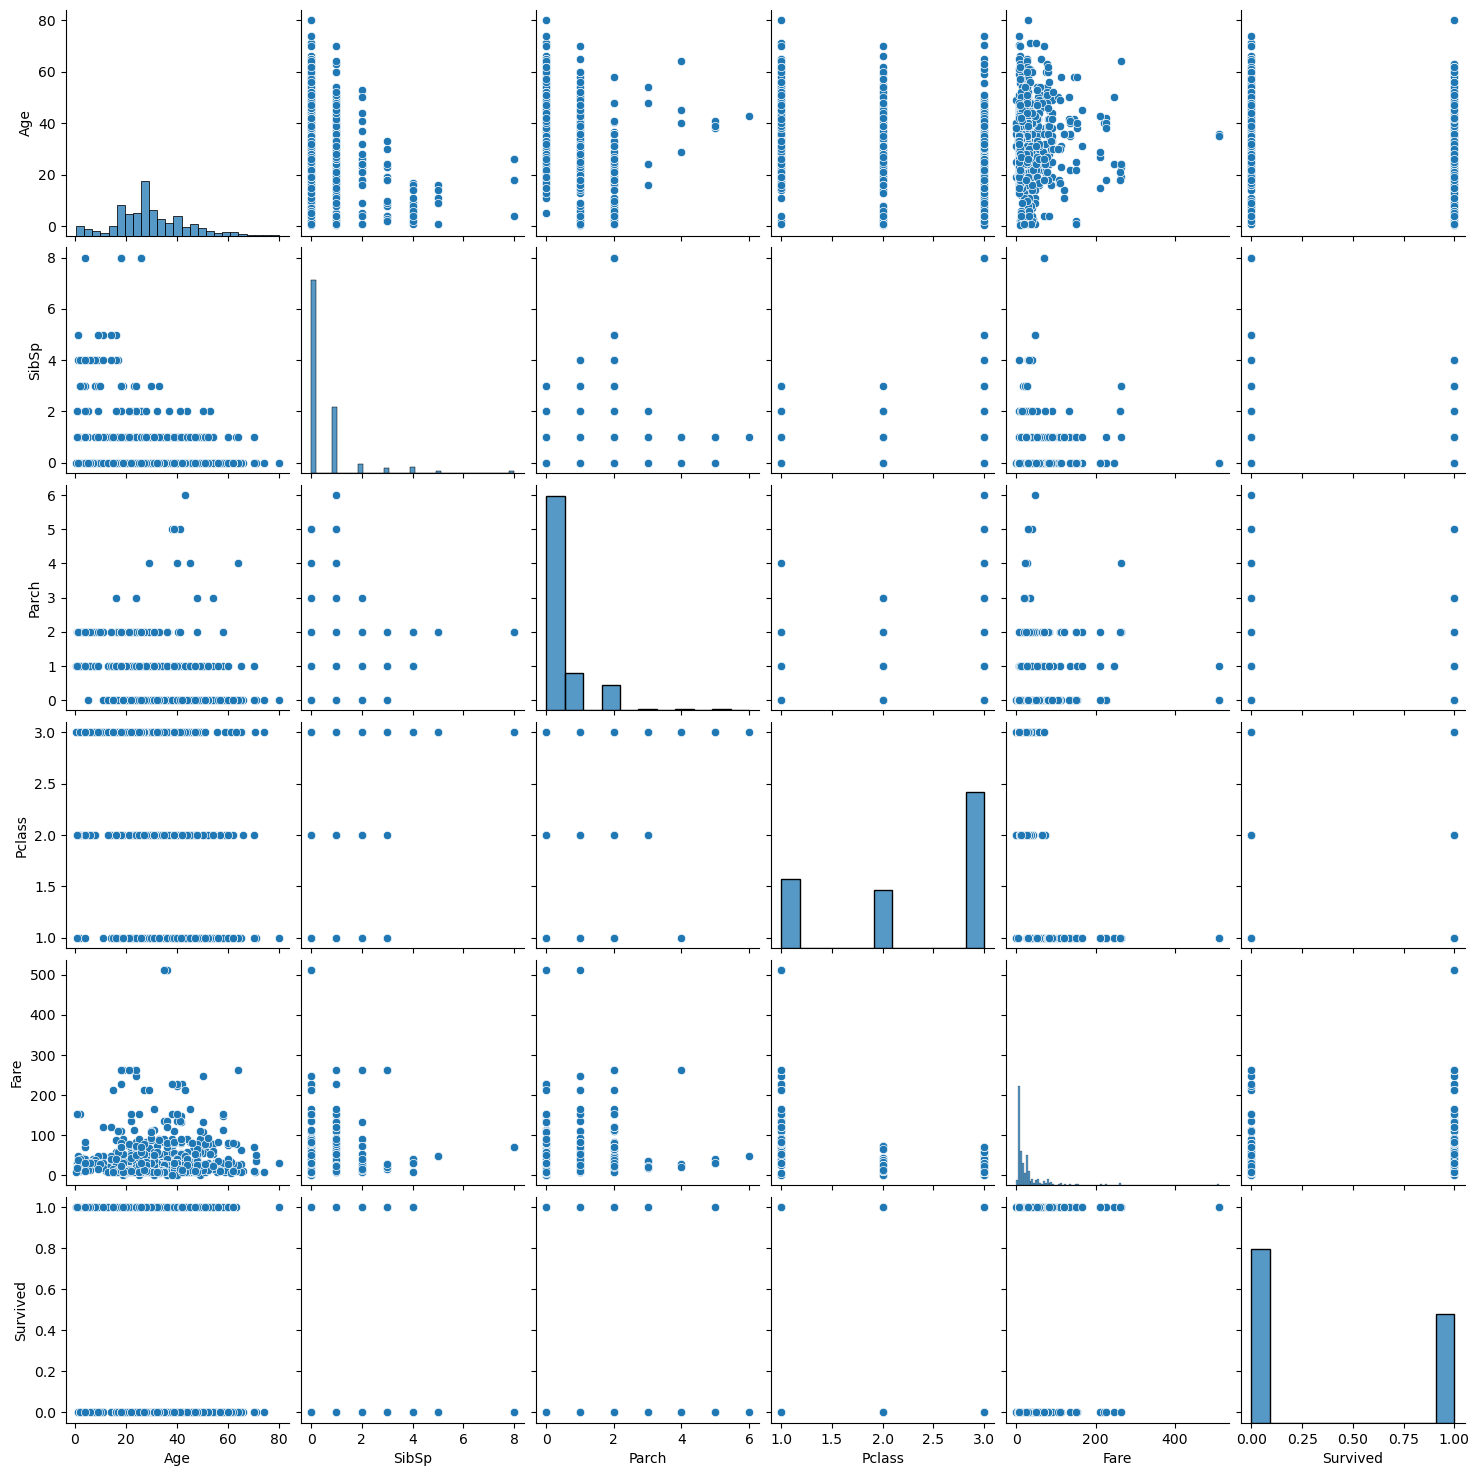

In [49]:
sns.pairplot(df)

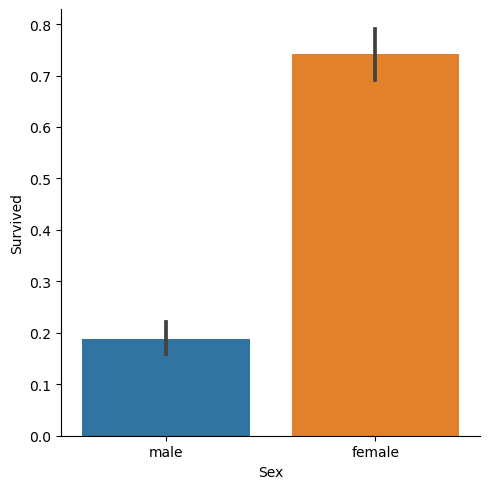

In [50]:
sns.catplot(x='Sex',y='Survived',data=df,kind='bar')

Here, we can see that female passengers survived more than male passengers.

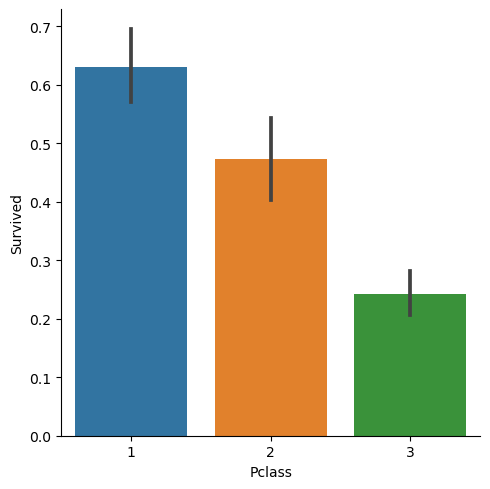

In [51]:
sns.catplot(x='Pclass',y='Survived',data=df,kind='bar')

We can see that Passengers from 1st class passengers survived more than other class passengers.

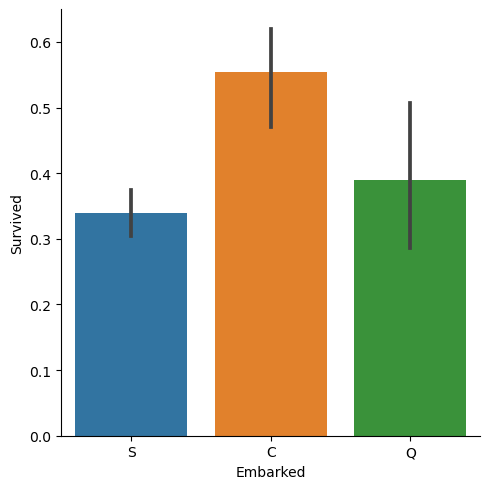

In [52]:
sns.catplot(x='Embarked',y='Survived',data=df,kind='bar')

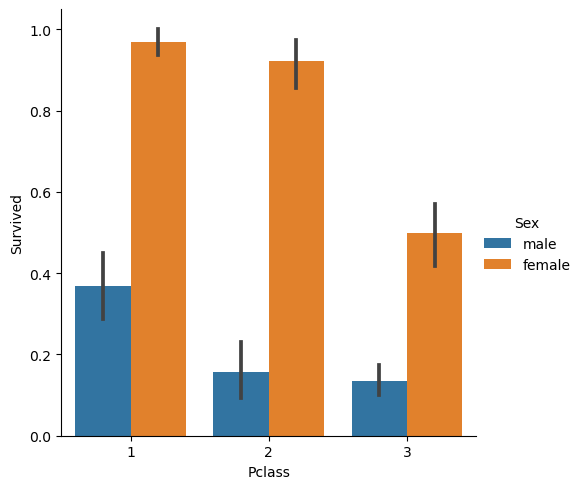

In [53]:
sns.catplot(x='Pclass',y='Survived', hue='Sex',data=df,kind='bar')

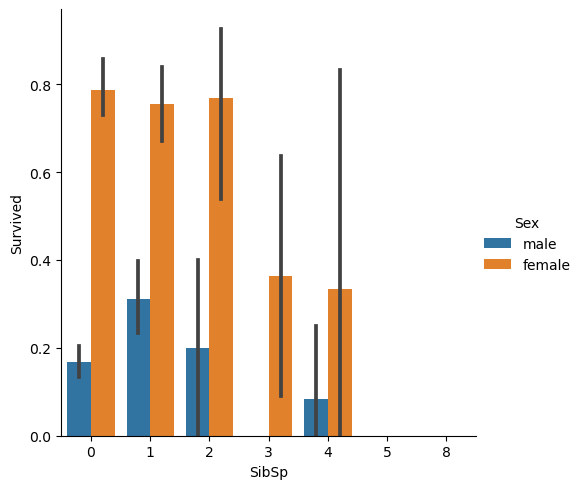

In [54]:
sns.catplot(x='SibSp',y='Survived', hue='Sex',data=df,kind='bar')

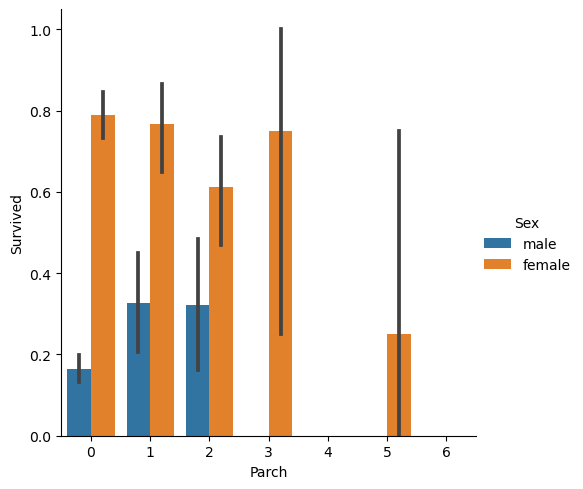

In [55]:
sns.catplot(x='Parch',y='Survived', hue='Sex',data=df,kind='bar')

<Axes: xlabel='Pclass', ylabel='count'>

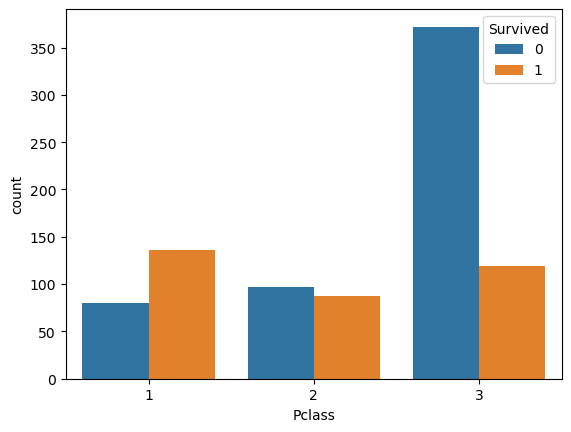

In [56]:
sns.countplot(x='Pclass',hue='Survived',data=df)

<Axes: xlabel='Sex', ylabel='count'>

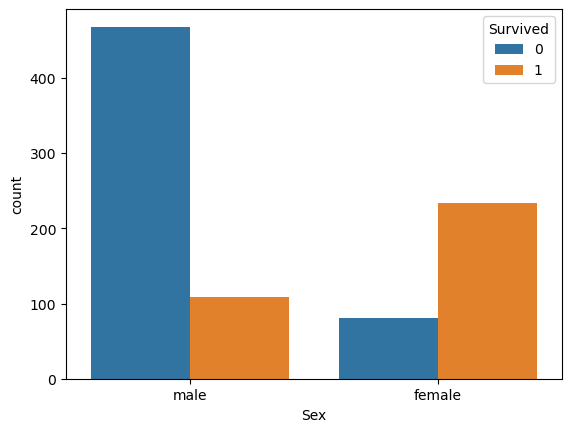

In [57]:
sns.countplot(x='Sex',hue='Survived',data=df)

<Axes: xlabel='Embarked', ylabel='count'>

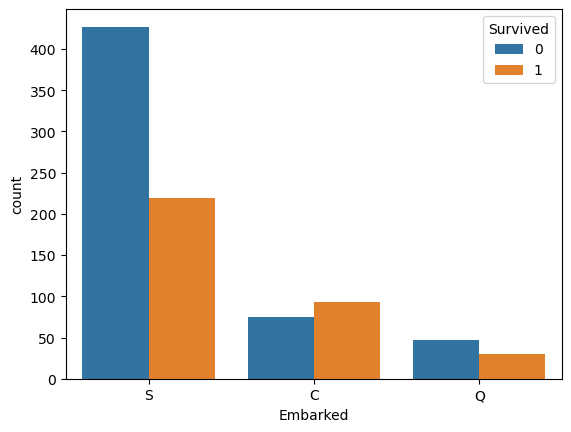

In [58]:
sns.countplot(x='Embarked',hue='Survived',data=df)

<Axes: xlabel='Parch', ylabel='count'>

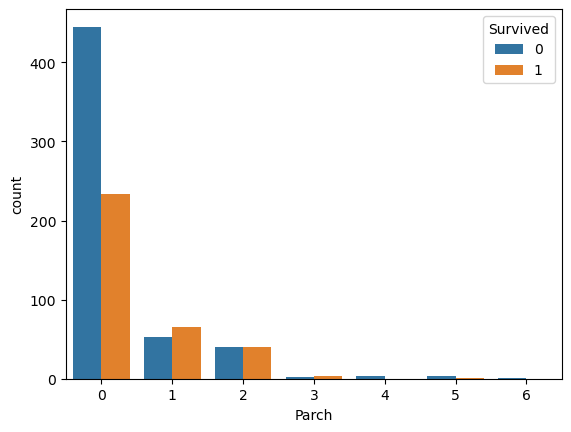

In [59]:
sns.countplot(x='Parch',hue='Survived',data=df)

<Axes: xlabel='SibSp', ylabel='count'>

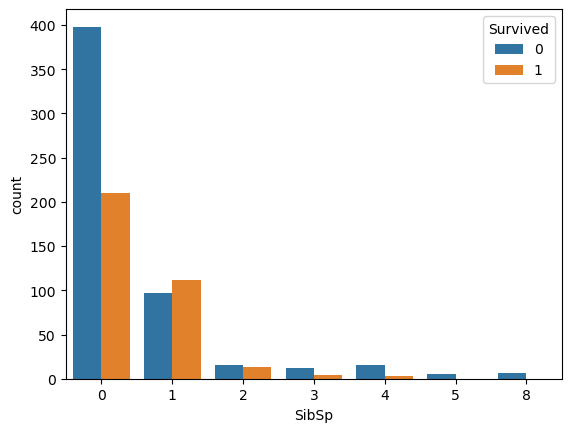

In [60]:
sns.countplot(x='SibSp',hue='Survived',data=df)

In [61]:
df.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Pclass', 'Embarked', 'Fare',
       'Survived'],
      dtype='object')

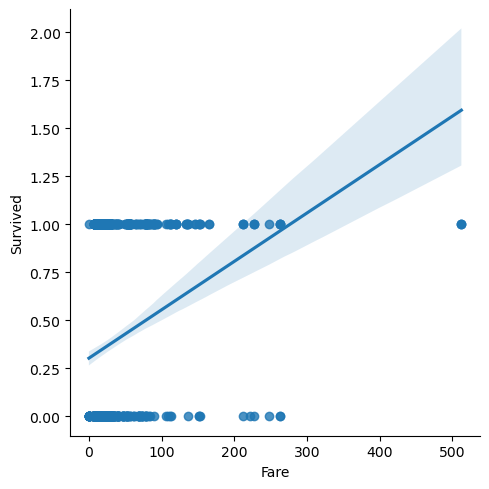

In [62]:
sns.lmplot(x='Fare', y='Survived', data =df)

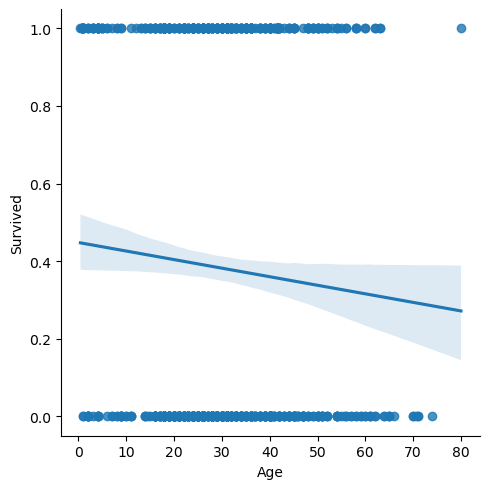

In [63]:
sns.lmplot(x='Age', y='Survived', data =df)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Pclass    891 non-null    int64  
 5   Embarked  891 non-null    object 
 6   Fare      891 non-null    float64
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Encoding categorical column

Converting Categorical column to numerical

In [65]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))


In [66]:
df

,Sex,Age,SibSp,Parch,Pclass,Embarked,Fare,Survived
0,1.0,22.0,1,0,3,2.0,7.2500,0
1,0.0,38.0,1,0,1,0.0,71.2833,1
2,0.0,26.0,0,0,3,2.0,7.9250,1
3,0.0,35.0,1,0,1,2.0,53.1000,1
4,1.0,35.0,0,0,3,2.0,8.0500,0
...,...,...,...,...,...,...,...,...
886,1.0,27.0,0,0,2,2.0,13.0000,0
887,0.0,19.0,0,0,1,2.0,30.0000,1
888,0.0,18.0,1,2,3,2.0,23.4500,0
889,1.0,26.0,0,0,1,0.0,30.0000,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    float64
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Pclass    891 non-null    int64  
 5   Embarked  891 non-null    float64
 6   Fare      891 non-null    float64
 7   Survived  891 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [68]:
df.describe()

,Sex,Age,SibSp,Parch,Pclass,Embarked,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.647587,29.143850,0.523008,0.381594,2.308642,1.536476,32.204208,0.383838
std,0.477990,13.496074,1.102743,0.806057,0.836071,0.791503,49.693429,0.486592
min,0.000000,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,2.000000,1.000000,7.910400,0.000000
50%,1.000000,26.000000,0.000000,0.000000,3.000000,2.000000,14.454200,0.000000
75%,1.000000,36.750000,1.000000,0.000000,3.000000,2.000000,31.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,3.000000,2.000000,512.329200,1.000000


Here, we can see that,
 
    1.The dataset looks perfect because it did not have any negative/invalid datas.
    2.The counts are same, so missing/null values.
    3.In "Fare" column, mean is greater than median, so Right side skewness.
    4.There is also huge difference between 75% and max in  'Fare' and 'Age'
      columns,so outliers are present.   

In [69]:
df.corr()

,Sex,Age,SibSp,Parch,Pclass,Embarked,Fare,Survived
Sex,1.000000,0.101399,-0.114631,-0.245489,0.131900,0.108262,-0.182333,-0.543351
Age,0.101399,1.000000,-0.270325,-0.184621,-0.416039,-0.010196,0.122178,-0.061171
SibSp,-0.114631,-0.270325,1.000000,0.414838,0.083081,0.068230,0.159651,-0.035322
Parch,-0.245489,-0.184621,0.414838,1.000000,0.018443,0.039798,0.216225,0.081629
Pclass,0.131900,-0.416039,0.083081,0.018443,1.000000,0.162098,-0.549500,-0.338481
Embarked,0.108262,-0.010196,0.068230,0.039798,0.162098,1.000000,-0.224719,-0.167675
Fare,-0.182333,0.122178,0.159651,0.216225,-0.549500,-0.224719,1.000000,0.257307
Survived,-0.543351,-0.061171,-0.035322,0.081629,-0.338481,-0.167675,0.257307,1.000000


<Axes: >

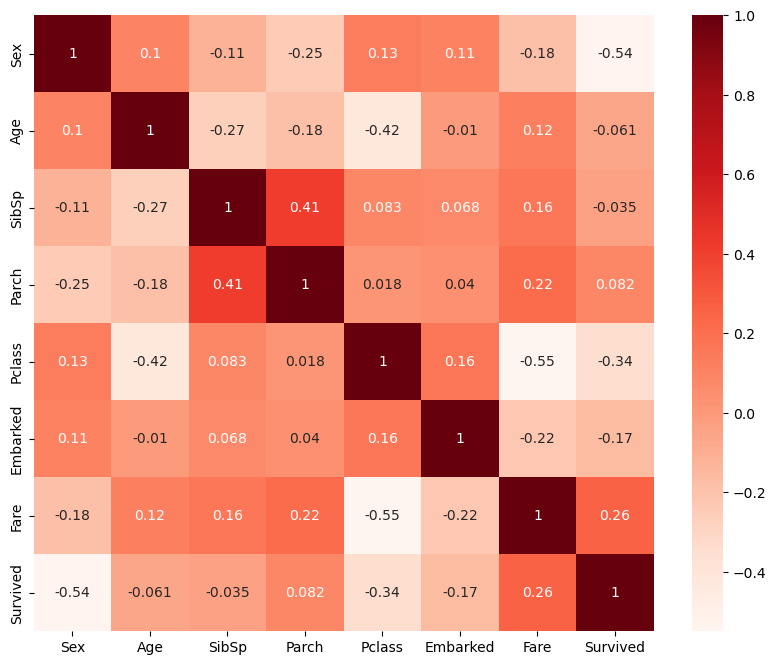

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

Here, we can observe that,

    1.Features such as "Sex" and"Fare" are positively correlated with target variable.
    2.Out of all features, "Sex" feature is having high positive correlation with target variable.
    3."Pclass" have negative correlation with target variable.

# Checking Outliers

Sex            Axes(0.125,0.712609;0.352273x0.167391)
Age         Axes(0.547727,0.712609;0.352273x0.167391)
SibSp          Axes(0.125,0.511739;0.352273x0.167391)
Parch       Axes(0.547727,0.511739;0.352273x0.167391)
Pclass          Axes(0.125,0.31087;0.352273x0.167391)
Embarked     Axes(0.547727,0.31087;0.352273x0.167391)
Fare               Axes(0.125,0.11;0.352273x0.167391)
Survived        Axes(0.547727,0.11;0.352273x0.167391)
dtype: object

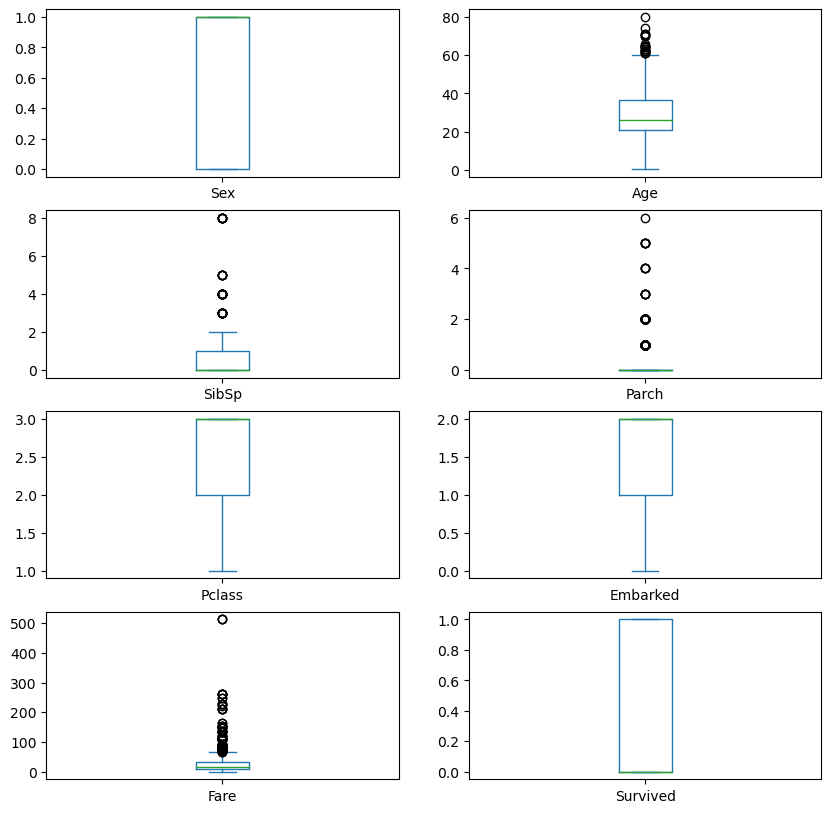

In [71]:
plot = df.plot(kind='box', subplots=True, layout=(4,2), figsize=(10,10))
plot

As we can see outliers are present, we will remove outliers using z score method

In [72]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Sex,Age,SibSp,Parch,Pclass,Embarked,Fare,Survived
0,0.737695,0.529625,0.432793,0.473674,0.827377,0.585954,0.502445,0.789272
1,1.355574,0.656571,0.432793,0.473674,1.566107,1.942303,0.786845,1.266990
2,1.355574,0.233076,0.474545,0.473674,0.827377,0.585954,0.488854,1.266990
3,1.355574,0.434159,0.432793,0.473674,1.566107,0.585954,0.420730,1.266990
4,0.737695,0.434159,0.474545,0.473674,0.827377,0.585954,0.486337,0.789272
...,...,...,...,...,...,...,...,...
886,0.737695,0.158939,0.474545,0.473674,0.369365,0.585954,0.386671,0.789272
887,1.355574,0.752037,0.474545,0.473674,1.566107,0.585954,0.044381,1.266990
888,1.355574,0.826174,0.432793,2.008933,0.827377,0.585954,0.176263,0.789272
889,0.737695,0.233076,0.474545,0.473674,1.566107,1.942303,0.044381,1.266990


In [73]:
# threshold =3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([3, 2, 3, 6, 2, 2, 2, 2, 3, 6, 1, 1, 6, 2, 2, 2, 3, 2, 2, 2, 2, 2,
        6, 2, 2, 2, 6, 6, 2, 6, 3, 6, 6, 2, 3, 3, 6, 2, 1, 6, 2, 2, 6, 3,
        3, 1, 3, 1, 3, 6, 2, 2, 6, 6, 6, 6, 3, 6, 6, 1, 3, 6, 2, 2, 2, 2,
        2, 2, 1, 3, 2, 3], dtype=int64))

In [74]:
z.iloc[13,3]

5.73284383018578

In [75]:
df_new=df[(z<3).all(axis=1)]

In [76]:
df_new

,Sex,Age,SibSp,Parch,Pclass,Embarked,Fare,Survived
0,1.0,22.0,1,0,3,2.0,7.2500,0
1,0.0,38.0,1,0,1,0.0,71.2833,1
2,0.0,26.0,0,0,3,2.0,7.9250,1
3,0.0,35.0,1,0,1,2.0,53.1000,1
4,1.0,35.0,0,0,3,2.0,8.0500,0
...,...,...,...,...,...,...,...,...
886,1.0,27.0,0,0,2,2.0,13.0000,0
887,0.0,19.0,0,0,1,2.0,30.0000,1
888,0.0,18.0,1,2,3,2.0,23.4500,0
889,1.0,26.0,0,0,1,0.0,30.0000,1


In [77]:
df.shape

(891, 8)

In [78]:
df_new.shape

(820, 8)

In [79]:
print("Data loss percentage = ",((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Data loss percentage =  7.968574635241302


In [80]:
df=df_new

In [81]:
df.shape

(820, 8)

# Checking Skewness

In [82]:
df.skew()

Sex        -0.664152
Age         0.366868
SibSp       1.979577
Parch       2.122629
Pclass     -0.632242
Embarked   -1.277386
Fare        2.318761
Survived    0.450825
dtype: float64

In [83]:
df['Fare'] = np.cbrt(df['Fare'])

In [84]:
df.skew()

Sex        -0.664152
Age         0.366868
SibSp       1.979577
Parch       2.122629
Pclass     -0.632242
Embarked   -1.277386
Fare        0.708623
Survived    0.450825
dtype: float64

As, we can see skewness is removed.

# Splitting target variable

In [85]:
x = df.drop("Survived", axis = 1)
y= df['Survived']

In [86]:
x

,Sex,Age,SibSp,Parch,Pclass,Embarked,Fare
0,1.0,22.0,1,0,3,2.0,1.935438
1,0.0,38.0,1,0,1,0.0,4.146318
2,0.0,26.0,0,0,3,2.0,1.993730
3,0.0,35.0,1,0,1,2.0,3.758647
4,1.0,35.0,0,0,3,2.0,2.004158
...,...,...,...,...,...,...,...
886,1.0,27.0,0,0,2,2.0,2.351335
887,0.0,19.0,0,0,1,2.0,3.107233
888,0.0,18.0,1,2,3,2.0,2.862294
889,1.0,26.0,0,0,1,0.0,3.107233


In [87]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

# To remove biasness, we use Standard scaler method

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Sex,Age,SibSp,Parch,Pclass,Embarked,Fare
0,0.722036,-0.572939,1.051956,-0.451141,0.833995,0.583162,-0.766275
1,-1.384973,0.691123,1.051956,-0.451141,-1.586804,-1.953669,1.623850
2,-1.384973,-0.256924,-0.563407,-0.451141,0.833995,0.583162,-0.703257
3,-1.384973,0.454111,1.051956,-0.451141,-1.586804,0.583162,1.204749
4,0.722036,0.454111,-0.563407,-0.451141,0.833995,0.583162,-0.691984
...,...,...,...,...,...,...,...
815,0.722036,-0.177920,-0.563407,-0.451141,-0.376405,0.583162,-0.316660
816,-1.384973,-0.809951,-0.563407,-0.451141,-1.586804,0.583162,0.500522
817,-1.384973,-0.888955,1.051956,3.088912,0.833995,0.583162,0.235725
818,0.722036,-0.256924,-0.563407,-0.451141,-1.586804,-1.953669,0.500522


# Checking multicollinearity

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,1.144053,Sex
1,1.392407,Age
2,1.263692,SibSp
3,1.301505,Parch
4,2.429523,Pclass
5,1.056335,Embarked
6,2.606745,Fare


Here we can see that no multicollinearity present between features.

# Balancing dataset

In [90]:
y.value_counts()

0    500
1    320
Name: Survived, dtype: int64

Here, we can see that data is not balanced. Since it is a classification problem, we will balance the data using oversampling method

In [91]:
import sklearn
from imblearn.over_sampling import SMOTE
SME = SMOTE()
x1,y1 = SME.fit_resample(x,y)

In [92]:
y1.value_counts()

0    500
1    500
Name: Survived, dtype: int64

Now, the dataset is balanced, we can go for model building

# Model Building

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAcc = 0
maxRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best accuracy is ", maxAcc, "at random state ", maxRS)
    

The best accuracy is  0.8666666666666667 at random state  48


Train Test Split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

# Classification Algorithms

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

Random Forest Classifier

In [96]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print("Accuracy for RandomForestClassifier model is ", accuracy_score(y_test,predRFC)*100)
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

Accuracy for RandomForestClassifier model is  85.33333333333334
[[124  22]
 [ 22 132]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       146
           1       0.86      0.86      0.86       154

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



Logistic Regression

In [97]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print("Accuracy for LogisticRegression model is ", accuracy_score(y_test,predLR)*100)
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

Accuracy for LogisticRegression model is  82.33333333333334
[[119  27]
 [ 26 128]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       146
           1       0.83      0.83      0.83       154

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



Support Vector Machine Classifier

In [98]:
svc = SVC()
svc.fit(x_train,y_train)
predSVC = svc.predict(x_test)
print("Accuracy for SVC model is ", accuracy_score(y_test,predSVC)*100)
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

Accuracy for SVC model is  85.0
[[124  22]
 [ 23 131]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       146
           1       0.86      0.85      0.85       154

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



Gaussian Naive Bayes

In [99]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)
predGNB = GNB.predict(x_test)
print("Accuracy for GaussianNB model is ", accuracy_score(y_test,predGNB)*100)
print(confusion_matrix(y_test,predGNB))
print(classification_report(y_test,predGNB))

Accuracy for GaussianNB model is  80.66666666666666
[[114  32]
 [ 26 128]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       146
           1       0.80      0.83      0.82       154

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



Decision Tree Classifier

In [100]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print("Accuracy for DecisionTreeClassifier model is ", accuracy_score(y_test,predDTC)*100)
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

Accuracy for DecisionTreeClassifier model is  82.66666666666667
[[123  23]
 [ 29 125]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       146
           1       0.84      0.81      0.83       154

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



KNeighbors Classifier

In [101]:
Knn = KNeighborsClassifier()
Knn.fit(x_train,y_train)
predKnn = Knn.predict(x_test)
print("Accuracy for KNeighbors Classifier model is ", accuracy_score(y_test,predKnn)*100)
print(confusion_matrix(y_test,predKnn))
print(classification_report(y_test,predKnn))

Accuracy for KNeighbors Classifier model is  85.0
[[122  24]
 [ 21 133]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       146
           1       0.85      0.86      0.86       154

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



Extra Trees Classifier

In [102]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC = ETC.predict(x_test)
print("Accuracy for ExtraTreesClassifier model is ", accuracy_score(y_test,predETC)*100)
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

Accuracy for ExtraTreesClassifier model is  85.33333333333334
[[120  26]
 [ 18 136]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       146
           1       0.84      0.88      0.86       154

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



Gradient Boosting Classifier

In [103]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC = GBC.predict(x_test)
print("Accuracy for GradientBoostingClassifier model is ", accuracy_score(y_test,predGBC)*100)
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))

Accuracy for GradientBoostingClassifier model is  85.0
[[129  17]
 [ 28 126]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       146
           1       0.88      0.82      0.85       154

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



AdaBoost Classifier

In [104]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print("Accuracy for AdaBoostClassifier model is ", accuracy_score(y_test,predABC)*100)
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

Accuracy for AdaBoostClassifier model is  83.33333333333334
[[122  24]
 [ 26 128]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       146
           1       0.84      0.83      0.84       154

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



Bagging Classifier

In [105]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print("Accuracy for BaggingClassifier model is ", accuracy_score(y_test,predBC)*100)
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

Accuracy for BaggingClassifier model is  83.66666666666667
[[128  18]
 [ 31 123]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       146
           1       0.87      0.80      0.83       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



# Cross Validation

In [106]:
#checking CV score for Random Forest Classifier

cv_score = cross_val_score(RFC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predRFC) - cv_score.mean())

[0.775 0.775 0.805 0.845 0.845]
0.8089999999999999
Difference between Accuracy score and CV score is  0.04433333333333345


In [107]:
#checking CV score for LogisticRegression

cv_score = cross_val_score(LR,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predLR) - cv_score.mean())

[0.755 0.81  0.725 0.8   0.78 ]
0.774
Difference between Accuracy score and CV score is  0.04933333333333334


In [108]:
#checking CV score for Support Vector Machine Classifier

cv_score = cross_val_score(svc,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predSVC) - cv_score.mean())

[0.78  0.83  0.765 0.83  0.835]
0.808
Difference between Accuracy score and CV score is  0.041999999999999926


In [109]:
#checking CV score for Gaussian Naive Bayes

cv_score = cross_val_score(GNB,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predGNB) - cv_score.mean())

[0.71  0.785 0.765 0.79  0.79 ]
0.768
Difference between Accuracy score and CV score is  0.03866666666666663


In [110]:
#checking CV score for Decision Tree Classifier

cv_score = cross_val_score(DTC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predDTC) - cv_score.mean())


[0.74  0.78  0.785 0.83  0.825]
0.792
Difference between Accuracy score and CV score is  0.03466666666666662


In [111]:
#checking CV score for KNeighbors Classifier

cv_score = cross_val_score(Knn,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predKnn) - cv_score.mean())


[0.76  0.805 0.78  0.83  0.855]
0.8059999999999998
Difference between Accuracy score and CV score is  0.04400000000000015


In [112]:
#checking CV score for Extra Trees Classifier

cv_score = cross_val_score(ETC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predETC) - cv_score.mean())

[0.77  0.79  0.795 0.85  0.855]
0.812
Difference between Accuracy score and CV score is  0.04133333333333333


In [113]:
#checking CV score for Gradient Boosting Classifier

cv_score = cross_val_score(GBC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predGBC) - cv_score.mean())


[0.805 0.82  0.81  0.825 0.83 ]
0.818
Difference between Accuracy score and CV score is  0.03200000000000003


In [114]:
#checking CV score for AdaBoost Classifier

cv_score = cross_val_score(ABC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predABC) - cv_score.mean())

[0.76  0.81  0.79  0.815 0.825]
0.8
Difference between Accuracy score and CV score is  0.033333333333333326


In [115]:
#checking CV score for Bagging Classifier

cv_score = cross_val_score(BC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predBC) - cv_score.mean())

[0.79  0.805 0.795 0.85  0.86 ]
0.8200000000000001
Difference between Accuracy score and CV score is  0.016666666666666607


Gradient Boosting Classifier is our best model because Accuracy score is high and difference between Accuracy score and CV score is least

# Gradient Boosting Classifier is our best model

# Hyper Parameter Tuning

In [116]:
#Using Grid Search CV on Extra Trees Classifier

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['friedman_mse', 'squared_error'],
              'loss'  :['log_loss', 'exponential'],
              'learning_rate':[0.0, 0.1, 1.0],
              'n_estimators' : [50, 100],
              'max_depth' : [1, 3, 10,]}


In [117]:
GCV = GridSearchCV(GradientBoostingClassifier(), parameters, cv = 5 )

In [118]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.0, 0.1, 1.0],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [1, 3, 10], 'n_estimators': [50, 100]})

In [119]:
Best_Parameters = GCV.best_params_
print(Best_Parameters)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 100}


# Building Final model using best parameters

In [120]:
Final_model= GradientBoostingClassifier(criterion = 'friedman_mse', max_depth = 3, n_estimators = 100, loss='exponential', learning_rate = 0.1)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
Accuracy = accuracy_score(y_test,pred)
print("Accuracy is ", Accuracy*100 )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy is  85.0
[[129  17]
 [ 28 126]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       146
           1       0.88      0.82      0.85       154

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



# The accuracy for our best model is 85%

# Plotting AUC - ROC Curve

In [121]:
from sklearn import metrics

In [122]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr, tpr)

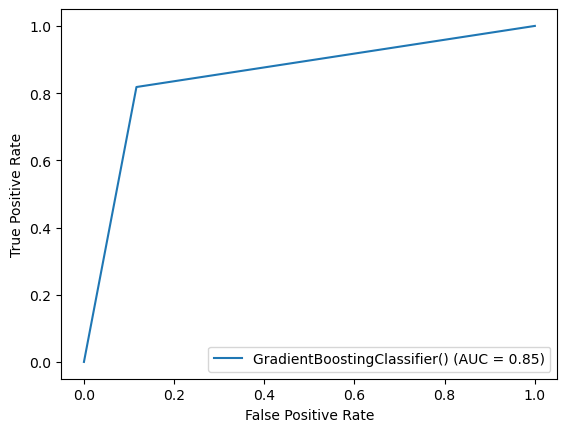

In [123]:
curve = metrics.RocCurveDisplay(fpr=fpr, tpr= tpr, roc_auc= roc_auc, estimator_name=Final_model)
curve.plot()

# Saving the best model

In [124]:
import joblib
joblib.dump(Final_model, "Titanic_survival_prediction.pkl")

['Titanic_survival_prediction.pkl']

# Loading and Prediction

In [125]:
import joblib
model= joblib.load("Titanic_survival_prediction.pkl")

In [126]:
prediction=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted value","original value"])

In [127]:
prediction

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Predicted value,1,1,1,1,1,1,1,1,0,1,...,0,1,1,1,1,0,0,0,1,1
original value,1,1,1,0,1,1,1,1,0,1,...,0,1,1,1,1,0,1,0,1,1
